# NLP: Remarks Analysis

In [1]:
# Relevant libraries

import pandas as pd
import numpy as np
import nltk
# !pip install langdetect
from langdetect import detect, detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator, constants
from pprint import pprint

from deep_translator import GoogleTranslator

In [2]:
# reading data from file
data = pd.read_csv("data/remark_data.csv")

In [3]:
data.head()

,remark
0,byr arisan januari
1,arisan barang
2,etoll cfhro
3,belanja muse 12mar
4,ruko 2


In [4]:
data.shape

(9746, 1)

In [5]:
# language codes csv file
lang_codes = pd.read_csv("data/language_codes.csv")

In [6]:
lang_codes.head()

,ISO language name,639-1 codes
0,Abkhazian,ab
1,Afar,aa
2,Afrikaans,af
3,Akan,ak
4,Albanian,sq


In [7]:
def language_detection(text, method = "single"):
    
    """
    @desc: 
    - detects the language of a text
    @params:
    - text: the text which language needs to be detected
    - method: detection method: 
      single: if the detection is based on the first option (detect)
    @return:
    - the langue/list of languages
    """

    if(method.lower() != "single"):
        result = detect_langs(text)

    else:
        result = detect(text)

    return result

In [8]:
translation_list = []
language = []

# Get the Language using landetect
for item in data["remark"]:
    text = item
    result = language_detection(text, "all languages")
    
    no_of_lang_detect = len(result)

    pred_lang = str(result[0])[0:2]
    score = str(result[0])[3:7]
    score = float(score)


    lang = ""
    
    # to get the highest language accuracy score prediction
    if no_of_lang_detect > 1:
        score_list = []
        for item in range(0, no_of_lang_detect):
            pred_lang = str(result[item])[0:2]
            score = str(result[item])[3:7]
            score = float(score)

            # score_list[pred_lang]=score
            score_list.append([pred_lang, score])

        highest_score = 0
        for item in score_list:

            score = item[1]

            if highest_score < score:
                highest_score = score
                lang = item[0]

    else:
        # store the ISO 639-1 language code
        lang = str(result)[1:3]
    
    # Get the index of the language code in the language_codes dataset
    lang_index = lang_codes.index[lang_codes["639-1 codes"] == lang].tolist()
    
    # converts the index to int
    lang_index = int(lang_index[0])
    
    # gets the full language name
    lang = lang_codes["ISO language name"][lang_index]
    
    # adds the langauge to list
    language.append(lang)

In [9]:
data["language"] = language

In [10]:
data.head()

,remark,language
0,byr arisan januari,Indonesian
1,arisan barang,Tagalog
2,etoll cfhro,Italian
3,belanja muse 12mar,Indonesian
4,ruko 2,Croatian


## Demographic segmentation using Language

In [11]:
data["language"].value_counts()

Indonesian                       3000
Tagalog                          1505
English                           580
Somali                            435
Croatian                          360
Slovenian                         326
Swahili                           301
Welsh                             299
Finnish                           292
Italian                           291
Estonian                          259
Turkish                           231
Catalan, Valencian                210
Albanian                          191
Norwegian                         171
Romanian, Moldavian, Moldovan     169
Lithuanian                        150
Swedish                           128
Afrikaans                         119
Spanish, Castilian                110
Danish                             96
Latvian                            93
Slovak                             90
Portuguese                         90
Dutch, Flemish                     51
Hungarian                          44
Polish      

<AxesSubplot:>

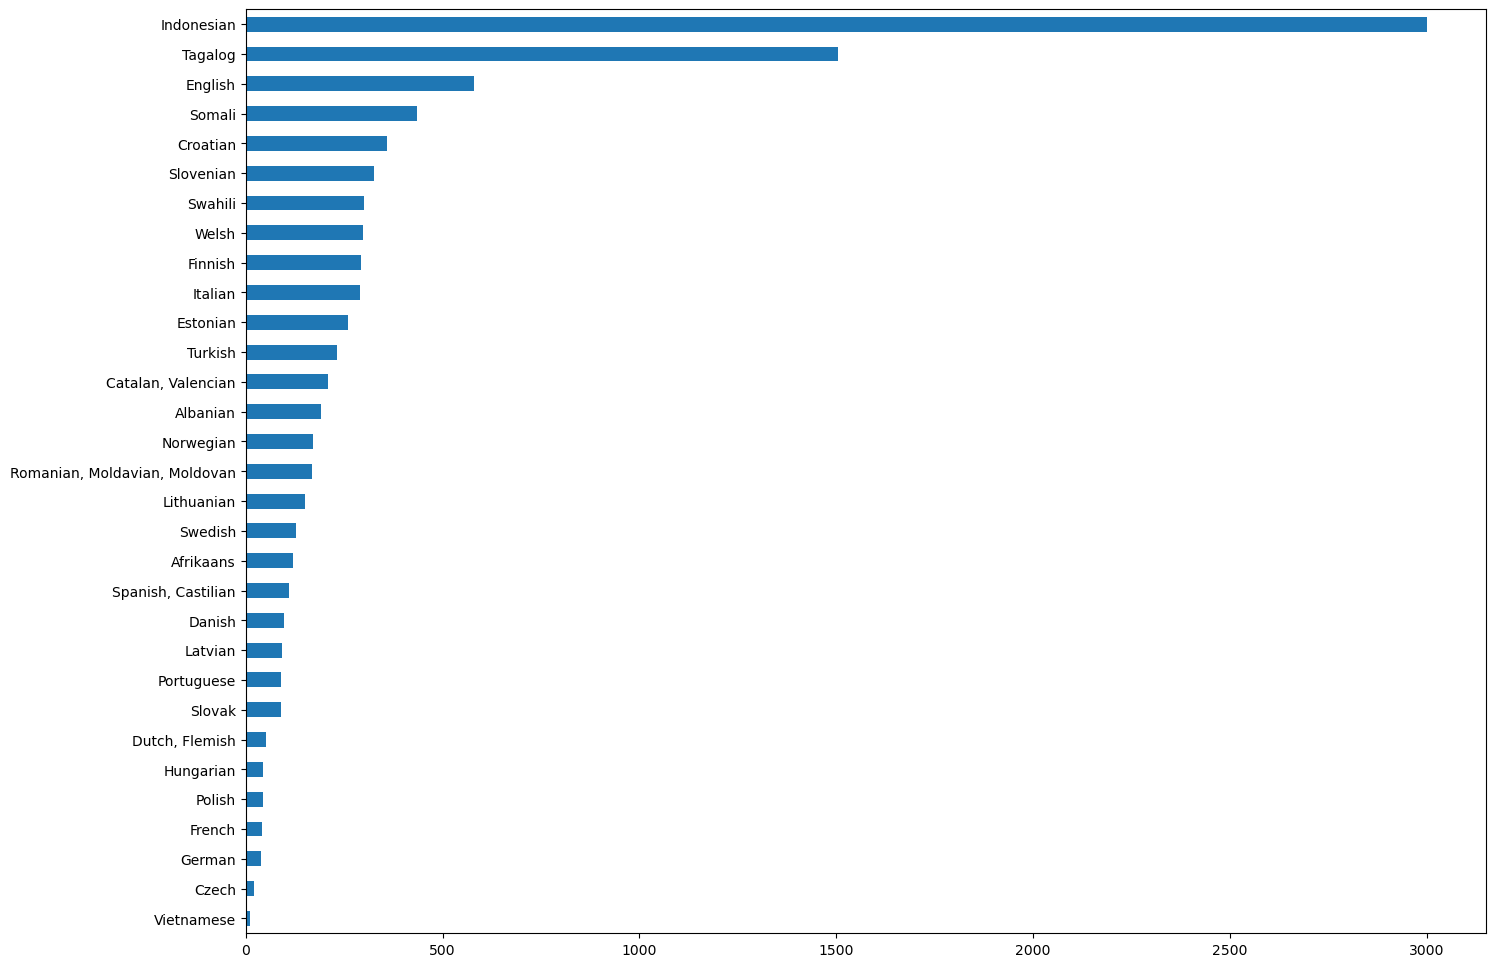

In [12]:
plt.figure(figsize=(16,12))
data["language"].value_counts(ascending = True).plot(kind='barh')

Note: <strong>30.7%</strong> of the transactions are from <strong>Indonesia.</strong>
- Tagalog = 15%
- English = 5.9%
- Somali = 4.4%
- Croatian = 3.6%

## Text Analysis

This will be performed on 1000 randomly selected sample data, to extract insights from the dataset.

In [13]:
# Generate sample data of 1000 rows
s_data = data.sample(1000)

In [14]:
# initialize the Google API translator
translator = Translator()

In [15]:
# list to store english translation
translation_list = []

# Gets the name of language and translates it to english
for item in s_data["remark"]:
    # the text to be translated
    text = item
    
    # translate text to english
    translation = translator.translate(text)
    en_translation = translation.text
    
    # adds the translated text to list
    translation_list.append(en_translation)
    
# print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

In [16]:
# saves the list as column in dataframe
s_data["en_translation"] = translation_list

In [17]:
s_data.head()

,remark,language,en_translation
4526,jumat berkah,Indonesian,Blessed Friday
2912,kasbon sms,Latvian,Kasbon SMS
3280,rmhyatimbahagia,Indonesian,rmhyatimbahagia
3209,eko byr mobil,Czech,Eko offers mobile
3972,ccln 2 hp samsung,Tagalog,ccln 2 hp samsung


In [18]:
s_data.to_csv("sample_data.csv", index=False)

In [19]:
# checks for null values
s_data.isnull().sum()

remark            0
language          0
en_translation    0
dtype: int64

In [20]:
# stores data into new dataframe and resets index
df = s_data.copy()
df = df.reset_index(drop="index")

In [21]:
df.head()

,remark,language,en_translation
0,jumat berkah,Indonesian,Blessed Friday
1,kasbon sms,Latvian,Kasbon SMS
2,rmhyatimbahagia,Indonesian,rmhyatimbahagia
3,eko byr mobil,Czech,Eko offers mobile
4,ccln 2 hp samsung,Tagalog,ccln 2 hp samsung


### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
# split strings into words and lemmatize them

def lem(text):
    text = str(text)
    text = text.split(" ")
    # create new list to store the lemmatized words
    n_text = []
    
    # loop to lemmatize words
    for word in text:
        l_word = lemmatizer.lemmatize(word)
        n_text.append(l_word)
        
    # return text
    return n_text

df['remark'] = df['remark'].apply(lambda x: lem(x))

In [24]:
df.head()

,remark,language,en_translation
0,"[, jumat, berkah, ]",Indonesian,Blessed Friday
1,"[, kasbon, sm, ]",Latvian,Kasbon SMS
2,"[, rmhyatimbahagia, ]",Indonesian,rmhyatimbahagia
3,"[, eko, byr, mobil, ]",Czech,Eko offers mobile
4,"[, ccln, 2, hp, samsung, ]",Tagalog,ccln 2 hp samsung


In [25]:
#Remove all empty comments
empty_comment = [""]

for i in range(len(df)):
    if df['remark'][i]==empty_comment:
        df=df.drop(i)

df=df.reset_index(drop=True)

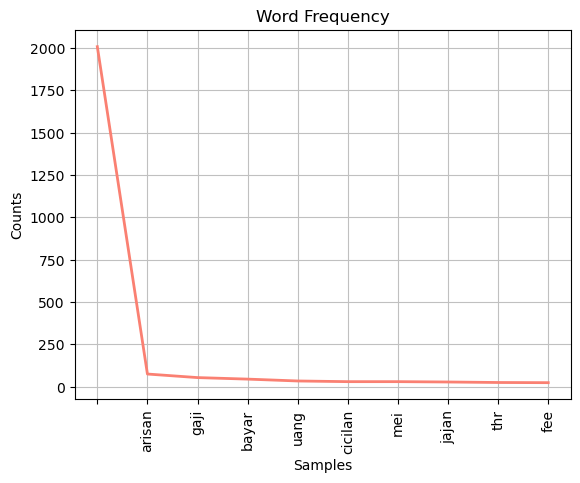

In [43]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df['remark'][i]

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(10, color='salmon', title='Word Frequency')

Graph of the Top 10 used words above

### Conclusion

Note: From the Analysis above,

The top 5 most used words in descending order are:

- "Arisan"; which is a microfinance rotational savings and credit association in Indonesia.
- "gaji"; which means wages,
- "bayar"; which means pay,
- "uang"; which means money,
- "cicilian"; which means installment.

We can assume majority of the users are saving with Arisan, paying wages, or financing installmental payments.